In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 0.4954 - accuracy: 0.8830
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2319 - accuracy: 0.9341
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1817 - accuracy: 0.9475
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1511 - accuracy: 0.9564
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1295 - accuracy: 0.9630
Epoc

In [2]:
# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [3]:
weight_init_std = 0.1
input_size = 784
hidden_size = 50

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
a1 = np.dot(X, W1) + b1

print(W1.shape, b1.shape, a1.shape)

(784, 50) (50,) (5, 50)


In [4]:
a1[0]

array([-0.21053544, -1.28847032, -0.08912362, -1.44059212, -0.56709579,
        2.267777  , -0.62555006, -0.92068202,  1.79416831,  1.51563612,
       -1.63079907, -0.59095816,  0.6817219 , -0.26606285,  2.39835807,
        0.74647388, -0.38499228,  0.41248978,  0.6763039 ,  0.42337816,
        0.68399423, -0.85016107, -0.33520698, -0.95593008, -0.80152258,
        0.60221867, -0.29902984, -0.22510584,  0.44002485,  1.72860197,
       -1.16634494,  1.25923541, -1.38477307,  2.19370096,  0.08261039,
        0.01426925,  0.4504334 ,  0.3181092 , -1.38616845,  1.0492983 ,
       -0.08533564,  0.5016137 ,  0.13927996, -0.16881868, -0.06849459,
        0.49676714,  0.46800196,  0.16846011,  1.32249932,  0.90361266])

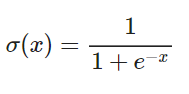

시그모이드 함수 구현

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
z1 = sigmoid(a1)
print(z1[0])

[0.4475597  0.21611184 0.47773383 0.19145367 0.36190723 0.90617295
 0.34852023 0.28481895 0.85743756 0.81989498 0.16372093 0.35641504
 0.6641229  0.43387391 0.91670201 0.67840989 0.40492339 0.60168473
 0.66291327 0.60429133 0.66462958 0.29939907 0.41697423 0.2776938
 0.30969992 0.64616374 0.42579466 0.44395998 0.60826495 0.84923351
 0.23751629 0.77889446 0.20024352 0.89968243 0.52064086 0.50356725
 0.61074227 0.57886338 0.20002015 0.74064013 0.47867903 0.62283848
 0.53476381 0.45789528 0.48288304 0.6216993  0.61491074 0.54201571
 0.78959723 0.71169134]


_그라디언트 소실로 잘 쓰지 않음_

Tanh 함수
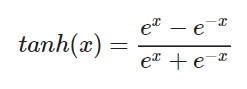  
그라디언트 소실 존재

In [8]:
def tanh(x):
    return np.exp(x)-np.exp(-x) / np.exp(x)+np.exp(-x)

Relu
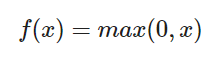  



In [9]:
def relu(x):
    return max(0, x)

단일 레이어 구현

In [11]:
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

In [12]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

print(a2[0])

[-0.18820751  0.27623162 -0.28509004 -0.54844539  0.03428592  0.82645791
 -0.13863879 -0.31736364 -0.5251513   0.03248395]


In [13]:
def softmax(x):
    if x.ndim ==2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [14]:
y_hat = softmax(a2)
y_hat[0]

array([0.08268245, 0.13155783, 0.07504777, 0.05767187, 0.1032859 ,
       0.22807461, 0.08688419, 0.07266438, 0.05903105, 0.10309995])

손실함수  
* 평균제곱오차
* 교차 엔트로피(Cross Entropy)

In [15]:
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [18]:
print(y_hat[0], t[0], sep='\n')

[0.08268245 0.13155783 0.07504777 0.05767187 0.1032859  0.22807461
 0.08688419 0.07266438 0.05903105 0.10309995]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [19]:
def cross_entropy_error(y,t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis=1)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.1479189432067423

In [20]:
batch_num = y_hat.shape[0]
dy = (y_hat -t) / batch_num
dy #softmax값 출력으로 loss 미분

array([[ 0.01653649,  0.02631157,  0.01500955,  0.01153437,  0.02065718,
        -0.15438508,  0.01737684,  0.01453288,  0.01180621,  0.02061999],
       [-0.18562445,  0.0327516 ,  0.01335916,  0.01135751,  0.0201227 ,
         0.04297252,  0.01722487,  0.01662416,  0.01331452,  0.01789741],
       [ 0.01838462,  0.02464241,  0.01294011,  0.01458368, -0.18227476,
         0.04197933,  0.01442157,  0.01646039,  0.01422965,  0.024633  ],
       [ 0.01640023, -0.17224042,  0.01209559,  0.01426851,  0.01599712,
         0.04356533,  0.01518701,  0.01547803,  0.01428729,  0.02496132],
       [ 0.01457866,  0.03201459,  0.01148614,  0.01347559,  0.01900338,
         0.03888483,  0.01377136,  0.02002269,  0.01527125, -0.1785085 ]])

In [23]:
dW2 = np.dot(z1.T, dy)
dW2
db2 = np.sum(dy, axis=0)

In [24]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [25]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [26]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1,b1,W2,b2

In [32]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [34]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# 순전파
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10) # 정답 원핫 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)

dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법으로 파라미터 업데이트
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2,dW1,db1, dW2, db2, learning_rate)

[[0.13466196 0.10407653 0.07671962 0.1359547  0.11912246 0.09791215
  0.17007857 0.04356539 0.05325935 0.06464928]
 [0.12981117 0.11637866 0.06699754 0.1771726  0.09276577 0.12125533
  0.11785526 0.04411712 0.06595958 0.06768697]
 [0.15541051 0.08761766 0.07096232 0.14941421 0.11490553 0.1195253
  0.12650622 0.0437049  0.06016576 0.0717876 ]
 [0.12629468 0.1055097  0.06576857 0.16883143 0.10197541 0.11108188
  0.15335326 0.04682369 0.05613971 0.06422166]
 [0.14576302 0.11541332 0.07248588 0.12761173 0.09841564 0.12548886
  0.14137851 0.04709166 0.0531919  0.07315949]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.278613981069144


In [37]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2,cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)
    
    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
    
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [38]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_steop 다섯번
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.10325116 0.06960857 0.10604549 0.07031311 0.13831682 0.13077422
  0.05922663 0.09789564 0.0547566  0.16981175]
 [0.11350412 0.07634394 0.09895971 0.06518777 0.13933767 0.11852207
  0.05998201 0.11225091 0.05527987 0.16063193]
 [0.09113433 0.11088672 0.1047822  0.0748477  0.1531879  0.11026519
  0.06343694 0.09566834 0.05831546 0.13747521]
 [0.09719888 0.0883814  0.12084414 0.0659879  0.1350653  0.11173802
  0.06122883 0.11018882 0.05830618 0.15106053]
 [0.0952757  0.09957865 0.10557834 0.08696817 0.11857711 0.11796176
  0.06153101 0.11140789 0.06636987 0.1367515 ]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.1003945362072214
---------
[[0.11763459 0.07941964 0.08894961 0.06134399 0.14588048 0.14901372
  0.05265823 0.08205167 0.04975637 0.17329171]
 [0.13441348 0.08645667 0.08163683 0.05650115 0.14773481 0.13110604
  0.05334435 0.09414943 0.049

In [39]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    
    return y

In [40]:
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.15853661, 0.10718072, 0.05048693, 0.03750708, 0.15239557,
       0.20906929, 0.03353015, 0.04627103, 0.0344259 , 0.17059673])

In [41]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)
    
    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy


In [42]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.15853661 0.10718072 0.05048693 0.03750708 0.15239557 0.20906929
 0.03353015 0.04627103 0.0344259  0.17059673]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.06


In [43]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):
    
    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)
    
    print(W1.shape, b1.shape, W2.shape, b2.shape, sep='\n')
    return W1, b1, W2, b2
    

In [50]:
iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)
    # 학습 결과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
        

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.296991330105015
train acc, test acc | 0.09915, 0.1009
Loss:  0.8517271804140145
train acc, test acc | 0.7919833333333334, 0.7966


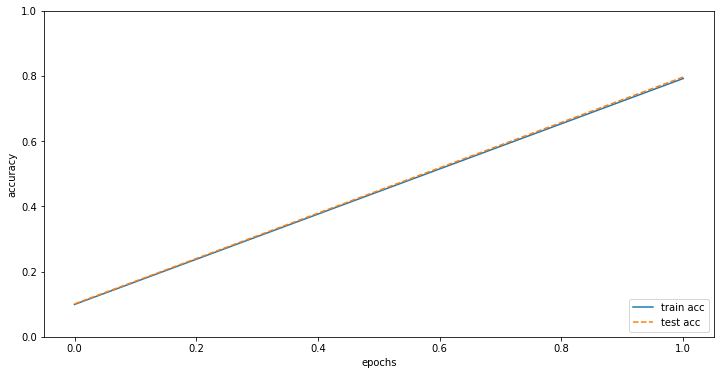

In [51]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6

markers = {'train': 'o', 'test':'s'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel('accuracy')
plt.ylim(0,1.0)
plt.legend(loc='lower right')
plt.show()

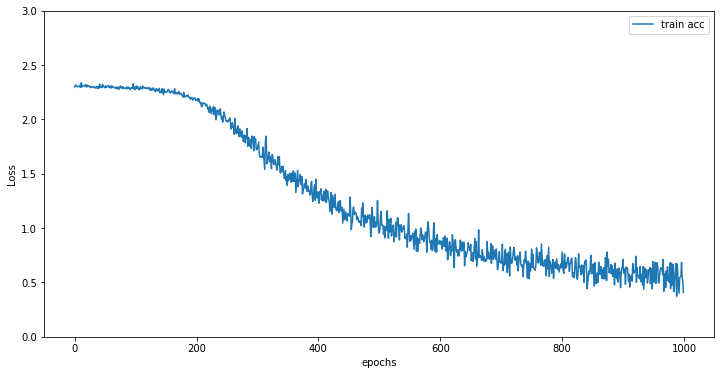

In [52]:
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel('Loss')
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()